In [14]:
#Importing the input
import numpy as np
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ML_Assignment/ML_A2_Inputs.csv", names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

     X1    X2     y
0 -0.41 -0.04 -0.11
1  0.34 -0.69  0.49
2 -0.59 -0.40 -0.13
3  0.49  0.63 -1.14
4  0.74  0.09 -1.04


In [15]:
#Knowing the input data
print(np.shape(df))
print(min(X1), max(X1))
print(min(X2), max(X2))
print(min(y), max(y))

(199, 3)
-0.99 0.99
-1.0 0.97
-3.08 1.44


Text(0.5, 0.92, 'Training data')

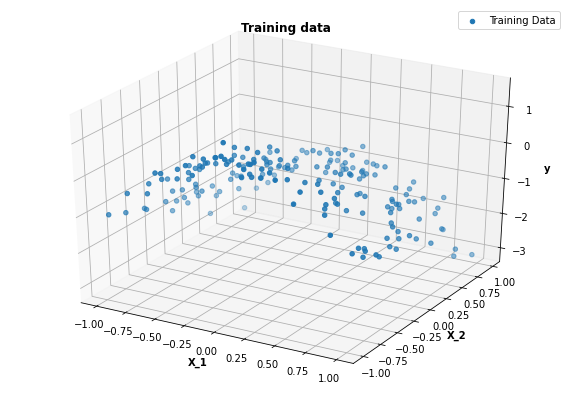

In [16]:
#Visualizing the input datsets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y, label = "Training Data")
ax.set_xlabel("X_1", fontweight ='bold')
ax.set_ylabel("X_2", fontweight ='bold')
ax.set_zlabel("y", fontweight ='bold')
ax.legend()
ax.set_title("Training data", fontweight ='bold')

In [17]:
#Splitting the model into train, and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [18]:
#Adding extra polynomial features equal to all combinations of powers of the two features up to power 5
from sklearn.preprocessing import PolynomialFeatures
Xtrain_poly = PolynomialFeatures(5).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(5).fit_transform(Xtest)
X_poly = PolynomialFeatures(5).fit_transform(X)

In [19]:
#Grid of feature values, to use for predictions
import numpy as np
Xt=[]
grid=np.linspace(-2,2)
for i in grid:
  for j in grid:
    Xt.append([i,j])
Xt = np.array(Xt)
XTest = PolynomialFeatures(5).fit_transform(Xt)

C =  1
-0.6925503355704697 [ 0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.]


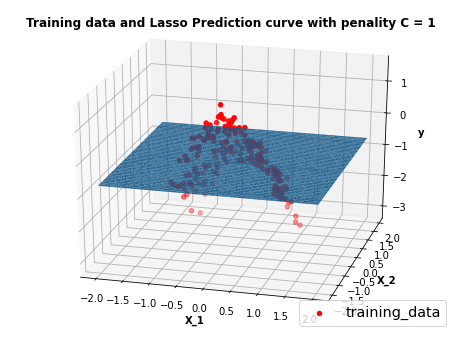

C =  10
-0.20079355250206915 [ 0.         -0.         -0.88992181 -1.45882711 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]


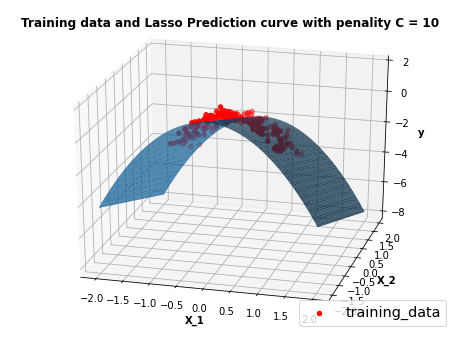

C =  100
-0.03281747191964268 [ 0.         -0.0089462  -1.02211486 -1.92955313  0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.08109469 -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.        ]


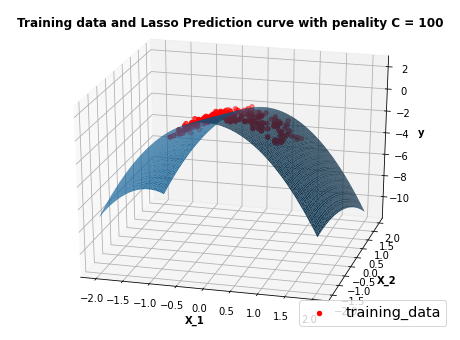

C =  1000
-0.062227997516087874 [ 0.         -0.04247156 -1.07647292 -1.79041096  0.23146803  0.10587446
  0.          0.01770423  0.          0.0606811  -0.08879364 -0.16315363
 -0.43178854 -0.1605949   0.          0.01687165  0.         -0.
  0.          0.1159849  -0.        ]


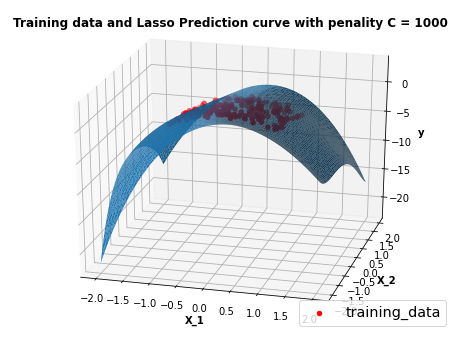

C =  10000
-0.05641822927125539 [ 0.         -0.06283101 -1.27708801 -1.82425568  0.33834521  0.10369054
 -0.07271448  0.37876127  0.07975758  0.69185916 -0.03816879 -0.26804899
 -0.45490792 -0.22454123 -0.00320563  0.16156224 -0.17651746 -0.17937643
 -0.31512258  0.18734009 -0.46561935]


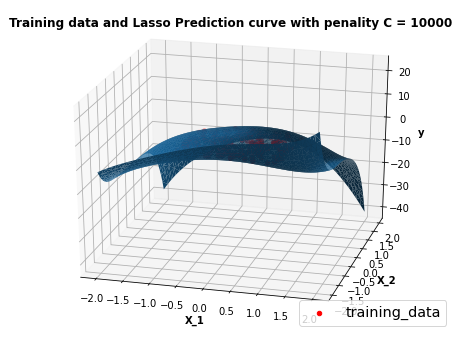

In [20]:
#Training Lasso regression models with the polynomial features
#Starting with c=1 as it penalized all parameters to zero 
c=[1,10,100,1000,10000]

for i in c:
  from sklearn.linear_model import Lasso
  Lasso_Model = Lasso(alpha = 1/(2*i)).fit(Xtrain_poly, ytrain)
  Lasso_pred = Lasso_Model.predict(XTest)

  print("C = ", i)
  print(Lasso_Model.intercept_, Lasso_Model.coef_)

  #Visualising our predictions against our training data
  figr = plt.figure(figsize =(8, 6))
  ax = figr.add_subplot(projection='3d')
  ax.scatter(X1,X2,y, c='r', label="training_data")
  ax.plot_trisurf(Xt[:,0], Xt[:,1], Lasso_pred)
  # ax.set_title("Prediction surface")
  ax.set_xlabel("X_1", fontweight ='bold')
  ax.set_ylabel("X_2", fontweight ='bold')
  ax.set_zlabel("y", fontweight ='bold')
  ax.legend(loc='lower right', fontsize = 'x-large')
  ax.set_title(f"Training data and Lasso Prediction curve with penality C = {i}",fontweight ='bold')
  ax.view_init(25, -75)
  plt.show()

C =  0.1
-0.2349701235157644 [ 0.         -0.04493004 -0.76090581 -0.9376732   0.04633357  0.0824262
  0.00134838 -0.09924199  0.0301765  -0.2132796  -0.69496346 -0.01724819
 -0.33349833 -0.05989905  0.02437079  0.01317288 -0.03241137 -0.01462324
 -0.00363656  0.0508449  -0.06685805]


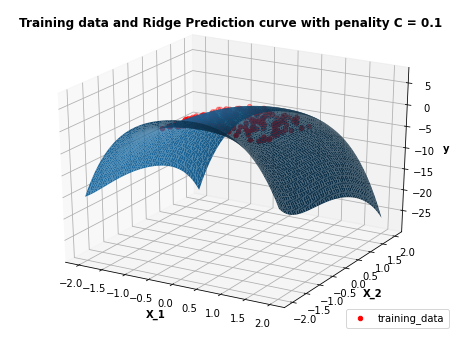

C =  1
-0.12576534597720068 [ 0.         -0.08007658 -1.02083251 -1.35542743  0.20727086  0.12482317
  0.00460773 -0.02319385  0.08732816 -0.03074908 -0.51509725 -0.11440407
 -0.49530067 -0.18074679  0.0196293   0.07020888 -0.01550591 -0.06460412
  0.05227554  0.08191149  0.03725494]


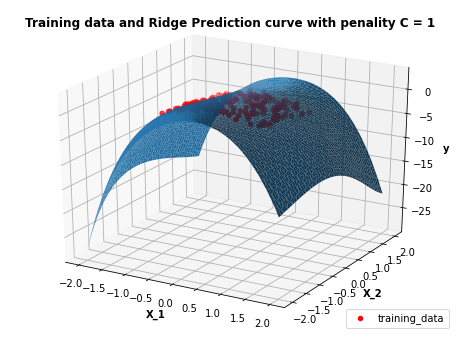

C =  10
-0.07476713569186555 [ 0.00000000e+00 -7.41047124e-02 -1.18815916e+00 -1.70869262e+00
  3.33836063e-01  1.19572743e-01 -6.90110312e-02  2.33490338e-01
  1.30890277e-01  4.04252380e-01 -1.55181634e-01 -2.44274206e-01
 -4.84653594e-01 -2.40799914e-01  1.10769367e-03  1.70232184e-01
 -1.11084356e-01 -1.92044472e-01 -1.76179302e-01  1.32223818e-01
 -2.48827646e-01]


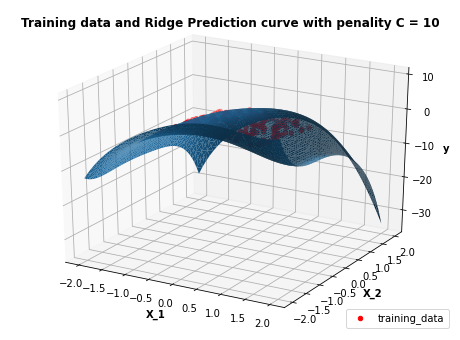

C =  100
-0.05860030204220734 [ 0.         -0.04681537 -1.30660707 -1.82029416  0.34720821  0.12293543
 -0.15716669  0.44961754  0.08293433  0.78268768 -0.03958044 -0.27765357
 -0.45794211 -0.22666494 -0.02692661  0.24414772 -0.21580201 -0.20567636
 -0.37676477  0.20725688 -0.53218121]


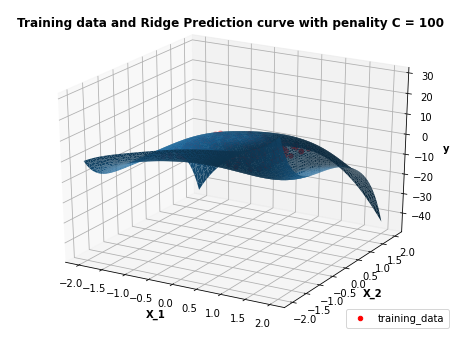

C =  1000
-0.05635026113186614 [ 0.         -0.04036977 -1.32821212 -1.83617826  0.34772734  0.12456319
 -0.17566691  0.48923677  0.06836507  0.85300729 -0.02312641 -0.28229095
 -0.45349948 -0.22269868 -0.03291961  0.25817541 -0.23589541 -0.20285471
 -0.41297191  0.22403185 -0.58546242]


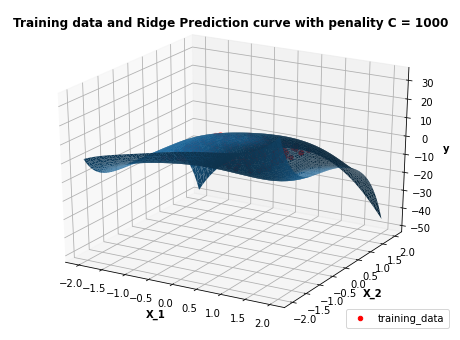

C =  10000
-0.056114794486906705 [ 0.         -0.03964666 -1.3305565  -1.8378495   0.34776285  0.12475545
 -0.17771622  0.49353714  0.06669179  0.8606528  -0.02139487 -0.28278038
 -0.45302467 -0.22225177 -0.03358338  0.25971099 -0.23808747 -0.20246999
 -0.4168943   0.22590505 -0.59126318]


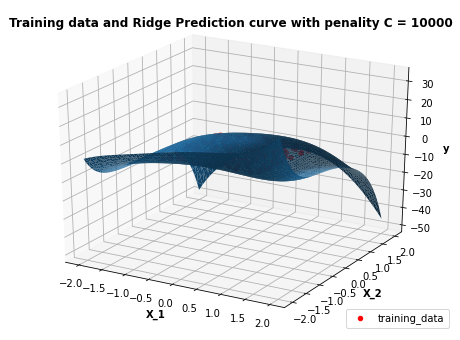

In [21]:
#Training Ridge regression models with the polynomial features
#using same c as Lasso to compare with Ridge, additionally checking for c=0.1
c=[0.1,1,10,100,1000,10000]

for i in c:
  from sklearn.linear_model import Ridge
  Ridge_Model = Ridge(alpha = 1/(2*i)).fit(Xtrain_poly, ytrain)
  Ridge_pred = Ridge_Model.predict(XTest)

  print("C = ", i)
  print(Ridge_Model.intercept_, Ridge_Model.coef_)

  #Visualising our predictions against our training data
  # plt.rc('font', size=8); plt.rcParams['figure.constrained_layout.use'] = True
  figr = plt.figure(figsize =(8, 6))
  ax = figr.add_subplot(projection='3d')
  ax.scatter(X1,X2,y, c='r', label="training_data")
  ax.plot_trisurf(Xt[:,0], Xt[:,1], Ridge_pred)
  # ax.set_title("Prediction surface")
  ax.set_xlabel("X_1", fontweight ='bold')
  ax.set_ylabel("X_2", fontweight ='bold')
  ax.set_zlabel("y", fontweight ='bold')
  ax.legend(loc='lower right', fontsize = 'medium')
  ax.set_title(f"Training data and Ridge Prediction curve with penality C = {i}",fontweight ='bold')
  ax.view_init(25, -60)
  plt.show()

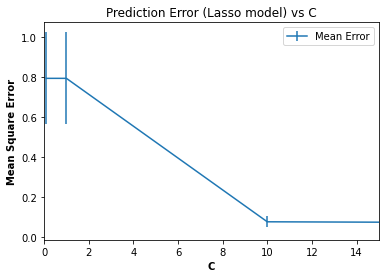

In [28]:
#Using K-Fold to cross validate, and find best C value for Lasso Regression
#best C means, optimum penalty with minimum MSE in the model
mean_error=[]; std_error=[]
c=[0.1,1,10,100,1000,10000]
for Ci in c:
  model = Lasso(alpha=1/(2*Ci))
  temp=[]
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5)
  for train, test in kf.split(X): ##
    XtrPoly = PolynomialFeatures(5).fit_transform(X[train])
    XtePoly = PolynomialFeatures(5).fit_transform(X[test])
    model.fit(XtrPoly, y[train]) ##
    ypred = model.predict(XtePoly) ##
    from sklearn.metrics import mean_squared_error
    temp.append(mean_squared_error(y[test],ypred)) ##
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())
import matplotlib.pyplot as plt
# iter = np.array(c)
# cVal = range(len(iter))
plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
# plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
plt.title("Prediction Error (Lasso model) vs C")
plt.xlim((0,15))
plt.legend()
plt.show()


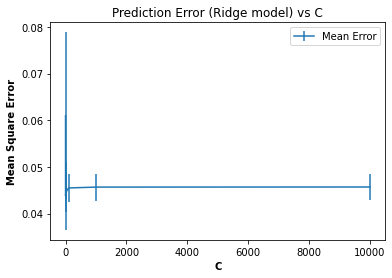

In [30]:
#Using K-Fold to cross validate, and find best C value for Ridge Regression
#best C means, optimum penalty with minimum MSE in the model
mean_error=[]; std_error=[]
c=[0.1,1,10,100,1000,10000]
for Ci in c:
  model = Ridge(alpha=1/(2*Ci))
  temp=[]
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5)
  for train, test in kf.split(X): ##
    XtrPoly = PolynomialFeatures(5).fit_transform(X[train])
    XtePoly = PolynomialFeatures(5).fit_transform(X[test])
    model.fit(XtrPoly, y[train]) ##
    ypred = model.predict(XtePoly) ##
    from sklearn.metrics import mean_squared_error
    temp.append(mean_squared_error(y[test],ypred)) ##
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())
import matplotlib.pyplot as plt
# iter = np.array(c)
# cVal = range(len(iter))
plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
# plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
plt.title("Prediction Error (Ridge model) vs C")
# plt.xlim((0,20))
plt.legend()
plt.show()

In [26]:
#comparing with baseline predictor
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)
from sklearn.metrics import mean_squared_error
print('square error of baseline dummy model: %f'%(mean_squared_error(ytest,ydummy)))
print('square error of baseline dummy model: %f'%(mean_squared_error(ytest,ydummy)))


square error of baseline dummy model: 0.858531
